# Intro to Statistical Analysis with Python

**Date**: November 7th, 2024

**Author**: Sunny Fang, yf2610

_Created as part of the Barnard College Computing Fellows Program, Fall 2024_


By the end of this workshop, students should be able to...
1. Write well-documented, interpretable code for statistical testing,
2. Interpret and explain statistical test results to an audience,
3. Feel comfortable selecting and implementing the appropriate statistical test for their project,

# 0. Setup

In [1]:
# %pip install pandas
# %pip install seaborn
# %pip install matplotlib
# %pip install scipy

In [2]:
# to process data
import pandas as pd

# for numerical processing
import numpy as np

# to plot data
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# to carry out statistical testing
from scipy import stats

sns.set_style('darkgrid')

# for datetime processing
import datetime as dt

# 1. Data Preprocessing

Today, we are using an air pollution dataset from [Kaggle](https://www.kaggle.com/datasets/sogun3/uspollution/data).

You can read the file with the following link: `https://drive.google.com/uc?id=1FNWe_pjSONfixgQHPz6o28tpg34Hiwvj`

**IMPORTANT NOTE:** usually files end with .csv, but since we are reading a file from a Google Drive link, it looks a bit different here

In [3]:
# TODO: replace the filename
# read the dataset using the link provided above
df = pd.read_csv("https://drive.google.com/uc?id=1FNWe_pjSONfixgQHPz6o28tpg34Hiwvj")

# remove max column restriction
pd.set_option("display.max_columns", None)

# display the first 5 rows
df.head(5)

,Unnamed: 0.1,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Units,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,1081788,9406,6,1,11,1100 21st Street,California,Alameda,Oakland,2011-01-01,Parts per billion,12.882609,19.0,16,18,Parts per million,0.015167,0.019,2,16,Parts per billion,0.591304,0.7,0,0.0,Parts per million,0.156522,0.2,0,NaN
1,1081789,9407,6,1,11,1100 21st Street,California,Alameda,Oakland,2011-01-01,Parts per billion,12.882609,19.0,16,18,Parts per million,0.015167,0.019,2,16,Parts per billion,0.591304,0.7,0,0.0,Parts per million,0.150000,0.2,15,2.0
2,1081790,9408,6,1,11,1100 21st Street,California,Alameda,Oakland,2011-01-01,Parts per billion,12.882609,19.0,16,18,Parts per million,0.015167,0.019,2,16,Parts per billion,0.557143,0.7,2,NaN,Parts per million,0.156522,0.2,0,NaN
3,1081791,9409,6,1,11,1100 21st Street,California,Alameda,Oakland,2011-01-01,Parts per billion,12.882609,19.0,16,18,Parts per million,0.015167,0.019,2,16,Parts per billion,0.557143,0.7,2,NaN,Parts per million,0.150000,0.2,15,2.0
4,1081792,9410,6,1,11,1100 21st Street,California,Alameda,Oakland,2011-01-02,Parts per billion,10.043478,20.3,23,19,Parts per million,0.021250,0.024,13,20,Parts per billion,0.543478,0.6,0,0.0,Parts per million,0.113043,0.2,0,NaN


In [4]:
df_cols = df.columns.to_list()
print(df_cols)

['Unnamed: 0.1', 'Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address', 'State', 'County', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean', 'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units', 'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units', 'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI', 'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI']


In [5]:
# Carry out basic data preprocessing techniques
# step 1: drop NaNs
df = df.dropna()

# step 2: drop columns we don't need
# TODO: keep everything *except for* the first 6 columns
# i.e., we don't need: Unnamed: 0.1, Unnamed: 0, State Code,County Code, Site Num, and Address
# there are several right answers to this!
# df = df.iloc[:,6:]
# df = df.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address'])
df.head()

,Unnamed: 0.1,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Units,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
1,1081789,9407,6,1,11,1100 21st Street,California,Alameda,Oakland,2011-01-01,Parts per billion,12.882609,19.0,16,18,Parts per million,0.015167,0.019,2,16,Parts per billion,0.591304,0.7,0,0.0,Parts per million,0.150000,0.2,15,2.0
5,1081793,9411,6,1,11,1100 21st Street,California,Alameda,Oakland,2011-01-02,Parts per billion,10.043478,20.3,23,19,Parts per million,0.021250,0.024,13,20,Parts per billion,0.543478,0.6,0,0.0,Parts per million,0.116667,0.2,0,2.0
9,1081797,9415,6,1,11,1100 21st Street,California,Alameda,Oakland,2011-01-03,Parts per billion,20.195652,41.0,8,39,Parts per million,0.008958,0.019,10,16,Parts per billion,0.800000,1.6,8,1.0,Parts per million,0.233333,0.5,23,6.0
13,1081801,9419,6,1,11,1100 21st Street,California,Alameda,Oakland,2011-01-04,Parts per billion,23.995652,37.2,8,35,Parts per million,0.006917,0.019,9,16,Parts per billion,1.354545,2.8,9,3.0,Parts per million,0.625000,1.1,8,13.0
17,1081805,9423,6,1,11,1100 21st Street,California,Alameda,Oakland,2011-01-05,Parts per billion,25.073913,38.9,8,36,Parts per million,0.008833,0.021,10,18,Parts per billion,1.331818,2.6,8,3.0,Parts per million,0.666667,1.3,8,15.0


In [6]:
# an important addition: as a good practice, when dealing with datetime objects in a dataframe,
df['Date Local'] = pd.to_datetime(df['Date Local'])

# 2. T-test example: one-sample t-test

On October 1, 2015, the Environmental Protection Agency strengthened the National Ambient Air Quality Standards: "areas will meet the standards if the 4th highest daily maximum 8-hour ozone concentration per year, averaged over three years, is **equal to or less than 70 ppb** (or 0.07 ppm) ([source](https://19january2017snapshot.epa.gov/ozone-pollution/2015-revision-2008-ozone-national-ambient-air-quality-standards-naaqs-supporting_.html)).

Here, we want to test whether or not the state of California (CA) meets the standard. For the purpose of this demonstration, we are going to loosen the "4th highest daily maximum 8-hour ozone concentration per year" assumption. Instead, we are going to see if the **average of the max O3 value across three years** meet the standards.

**Resources**:
- [How to filter by year](https://stackoverflow.com/questions/46878156/pandas-filter-dataframe-rows-with-a-specific-year)


## step 1: **data slicing**

In [7]:
# TODO: let's subset the data together!
# step 1: subset the data to get our desired output
# note: here, we subset for "O3 1st Max Value",
# but we can also use "O3 Mean" depending on our research question
# 1a: subset the dataset, keeping California only, name it 'ca'
ca = df[df['State'] == 'California']

# 1b: subset 'ca' to keep data where year is after 2011 (inclusive), name it 'ca_2011'
ca_2011 = ca[ca['Date Local'].dt.year >= 2011]

# 1c: subset 'ca_2011' to keep data where year is before 2013 (inclusive), name it 'ca_2011_2013'
ca_2011_2013 = ca_2011[ca_2011['Date Local'].dt.year <= 2013]

# 1d: last but not least, we can just keep the columns we want
ca_2011_2013 = ca_2011_2013[['Date Local', 'O3 1st Max Value']]

# alternatively, we can write all of this in one line!
# ca_2011_2013 = df[(df['State'] == 'California') & ((df['Date Local'].dt.year >= 2011) & (df['Date Local'].dt.year <= 2013))][['Date Local','O3 1st Max Value']]

# optional but highly recommended: rename columns for easier access
ca_2011_2013 = ca_2011_2013.rename(columns={"Date Local": "date",
                                            "O3 1st Max Value": "o3"})

# always a good idea to check the data
display(ca_2011_2013.head())

# save file
ca_2011_2013.to_csv("../data/ca_2011_2013.csv")
# if using Google colab:
# from google.colab import files
# files.download ("filename")

,date,o3
1,2011-01-01,0.019
5,2011-01-02,0.024
9,2011-01-03,0.019
13,2011-01-04,0.019
17,2011-01-05,0.021


## step 2: **define hypotheses**

Before we jump into data analysis, take a moment and formulate our null and alternative hypotheses:

- Null hypothesis ($H_0$): The mean value of the daily 1st max ozone concentration in CA is less than or equal to 0.07.

- Alternative Hypothesis ($H_A$): The mean value of the daily 1st max ozone concentration in CA is greater than 0.07.

## step 3: **define $\alpha$ (significance level)**

Typically, $\alpha$ is set to be 0.05.

### quick note on null distribution

What does the null and alternative hypothesis mean?

Text(0.5, 0.98, 'Distribution of Ozone concentration, assuming if the null hypothesis is true')

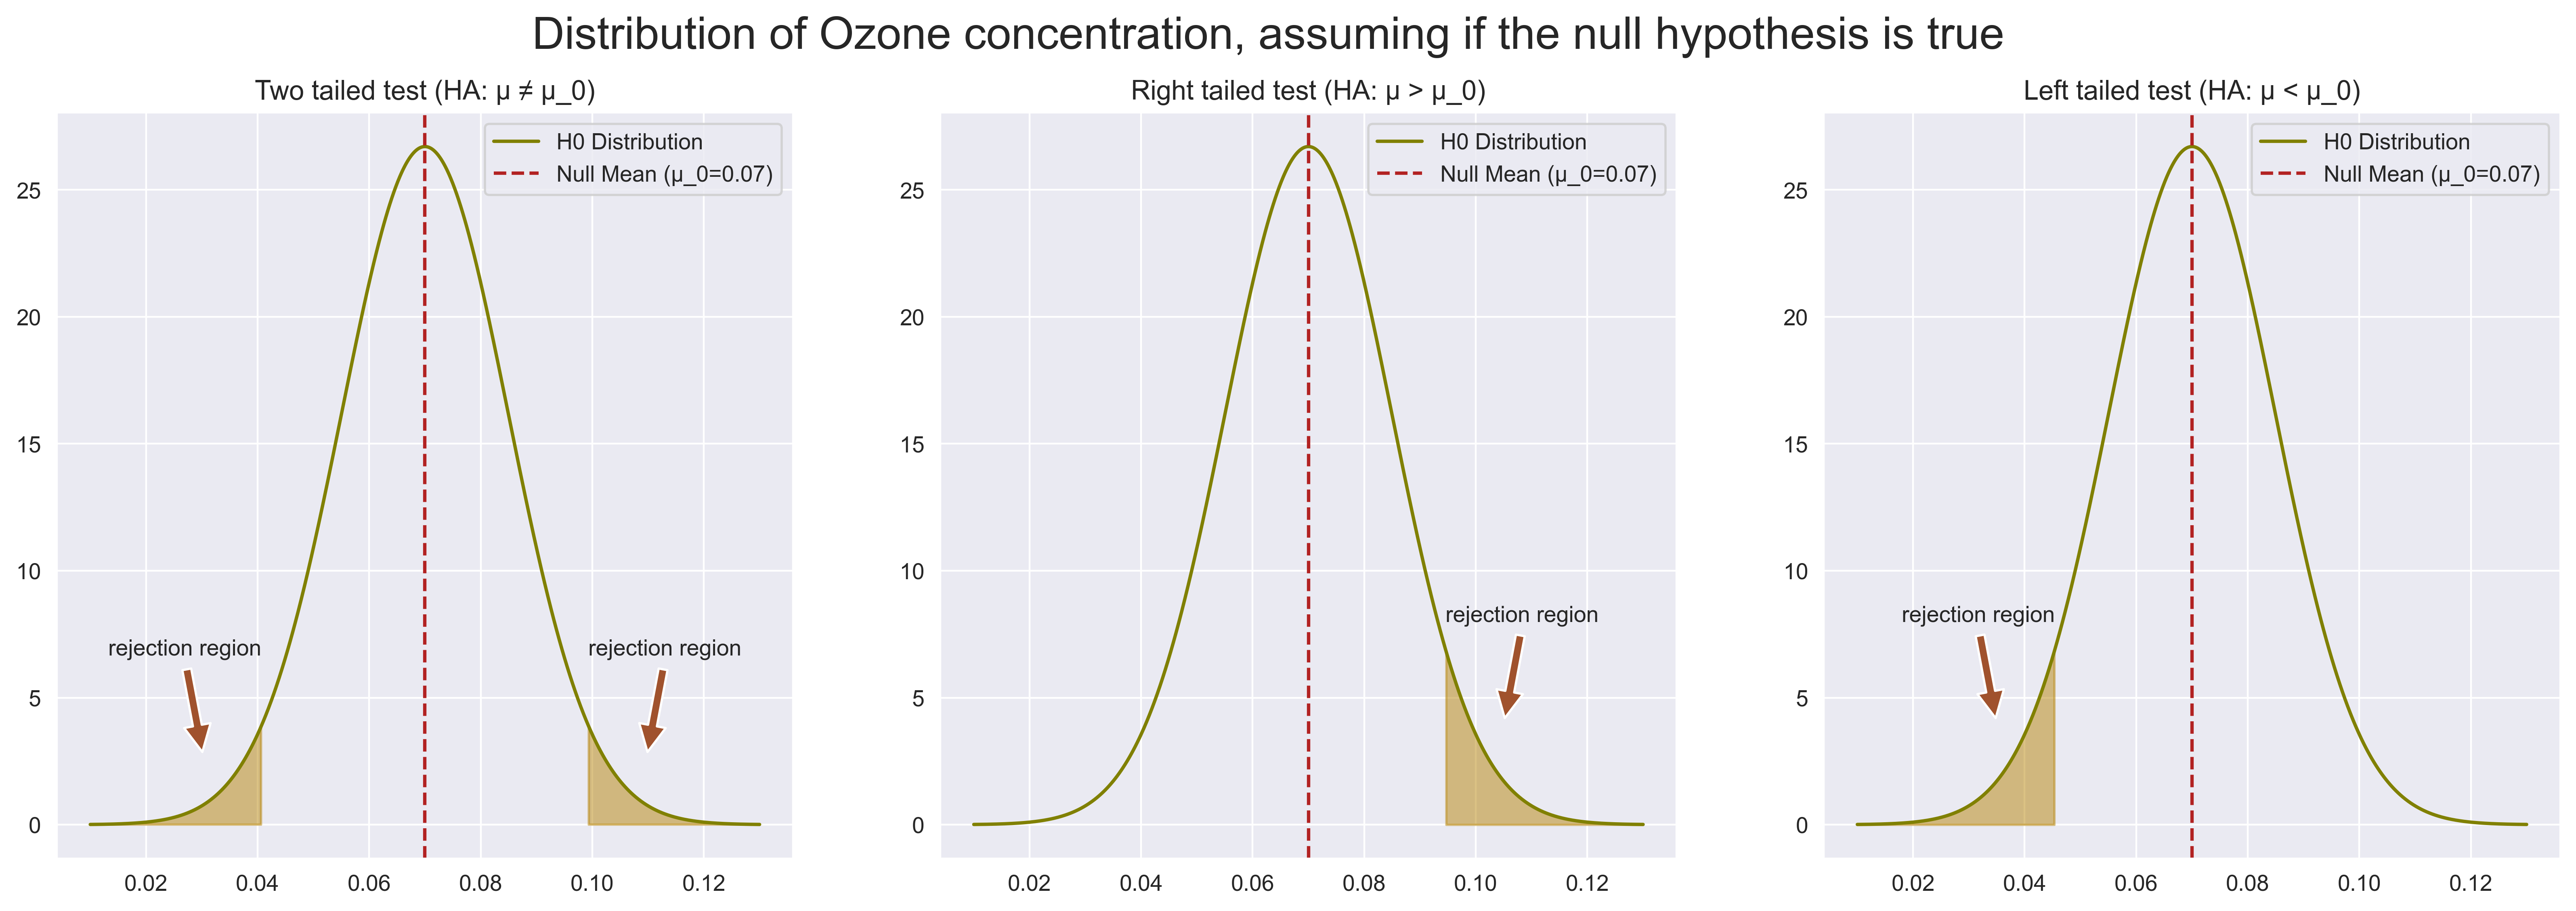

In [8]:
# parameters
x = ca_2011_2013['o3']
null_mean = 0.07
sample_std = np.std(x, ddof=1)
n = 1000

# generate x values for the plot
x = np.linspace(0.01, 0.13, 1000)

# calculate the normal distribution PDF
y = stats.norm.pdf(x, loc=null_mean, scale=sample_std)

# declare the figure
fig, ax = plt.subplots(1, 3, figsize=(20, 6), dpi = 400)

# plot the null hypothesis distribution for all three graphs
ax[0].plot(x, y, label='H0 Distribution', color='olive')
ax[1].plot(x, y, label='H0 Distribution', color='olive')
ax[2].plot(x, y, label='H0 Distribution', color='olive')

# === two tailed test ===
# i.e., if HA is μ ≠ μ0
lower_bound = stats.norm.ppf(0.025, loc=null_mean, scale=sample_std)
upper_bound = stats.norm.ppf(0.975, loc=null_mean, scale=sample_std)

# add vertical line for null hypothesis mean
ax[0].axvline(x=null_mean, color='firebrick', linestyle='--', label='Null Mean (μ_0=0.07)')

# fill in the rejection region (alpha = opacity)
ax[0].fill_between(x, y, where=(x <= lower_bound) | (x >= upper_bound), color='darkgoldenrod', alpha=0.5)

# add annotations for alternative hypothesis regions
ax[0].annotate('rejection region', xy=(lower_bound-sample_std*0.7, 0.1*max(y)),
             xytext=(lower_bound, 0.25*max(y)),
             arrowprops=dict(facecolor='sienna', shrink=0.05),
             ha='right')
ax[0].annotate('rejection region', xy=(upper_bound+sample_std*0.7, 0.1*max(y)),
             xytext=(upper_bound, 0.25*max(y)),
             arrowprops=dict(facecolor='sienna', shrink=0.05),
             ha='left')
ax[0].legend(loc='best')
ax[0].set_title('Two tailed test (HA: μ ≠ μ_0)')

# === right tailed test ===
# i.e., if HA is μ > μ0
right_tail = stats.norm.ppf(0.95, loc=null_mean, scale=sample_std)

# add vertical line for null hypothesis mean
ax[1].axvline(x=null_mean, color='firebrick', linestyle='--', label='Null Mean (μ_0=0.07)')

# fill in the rejection region (alpha = opacity)
ax[1].fill_between(x, y, where=(x >= right_tail), color='darkgoldenrod', alpha=0.5)

# add annotations for alternative hypothesis regions
ax[1].annotate('rejection region', xy=(right_tail+sample_std*0.7, 0.15*max(y)),
             xytext=(right_tail, 0.3*max(y)),
             arrowprops=dict(facecolor='sienna', shrink=0.05),
             ha='left')
ax[1].legend(loc='best')
ax[1].set_title('Right tailed test (HA: μ > μ_0)')

# === left tailed test ===
# i.e., if HA is μ < μ0
left_tail = stats.norm.ppf(0.05, loc=null_mean, scale=sample_std)

# add vertical line for null hypothesis mean
ax[2].axvline(x=null_mean, color='firebrick', linestyle='--', label='Null Mean (μ_0=0.07)')

# fill in the rejection region (alpha = opacity)
ax[2].fill_between(x, y, where=(x <= left_tail), color='darkgoldenrod', alpha=0.5)

# add annotations for alternative hypothesis regions
ax[2].annotate('rejection region', xy=(left_tail-sample_std*0.7, 0.15*max(y)),
             xytext=(left_tail, 0.3*max(y)),
             arrowprops=dict(facecolor='sienna', shrink=0.05),
             ha='right')
ax[2].legend(loc='best')
ax[2].set_title('Left tailed test (HA: μ < μ_0)')

fig.suptitle('Distribution of Ozone concentration, assuming if the null hypothesis is true', fontsize=20)

## step 4: **check assumptions**

Usually in t-tests, there are several assumptions that should be followed:
- Independence of samples: samples should be randomly selected
- Identically Distributed: samples should come from the same distribution
- Normality (or sample size >30): samples should be normally distributed (Q-Q plots)
- Equal variances: samples should have equal variances (box plots)

In our example, we are conducting a one-sample t-test, so only the first assumption applies. However, due to the nature of our data being collected over time, we are going to loosen the assumption that time has an effect on ground Ozone levels.

Resources:
- [Tutorial on t-tests](https://www.datacamp.com/tutorial/an-introduction-to-python-t-tests)

## step 5 (optional): **data visualization**


As seen earlier in the workshop, visualizations can be powerful! Here, we demonstrate some ways we can create visualizations for this question. You can find a section in the end of this note book for skeleton code used for plotting.

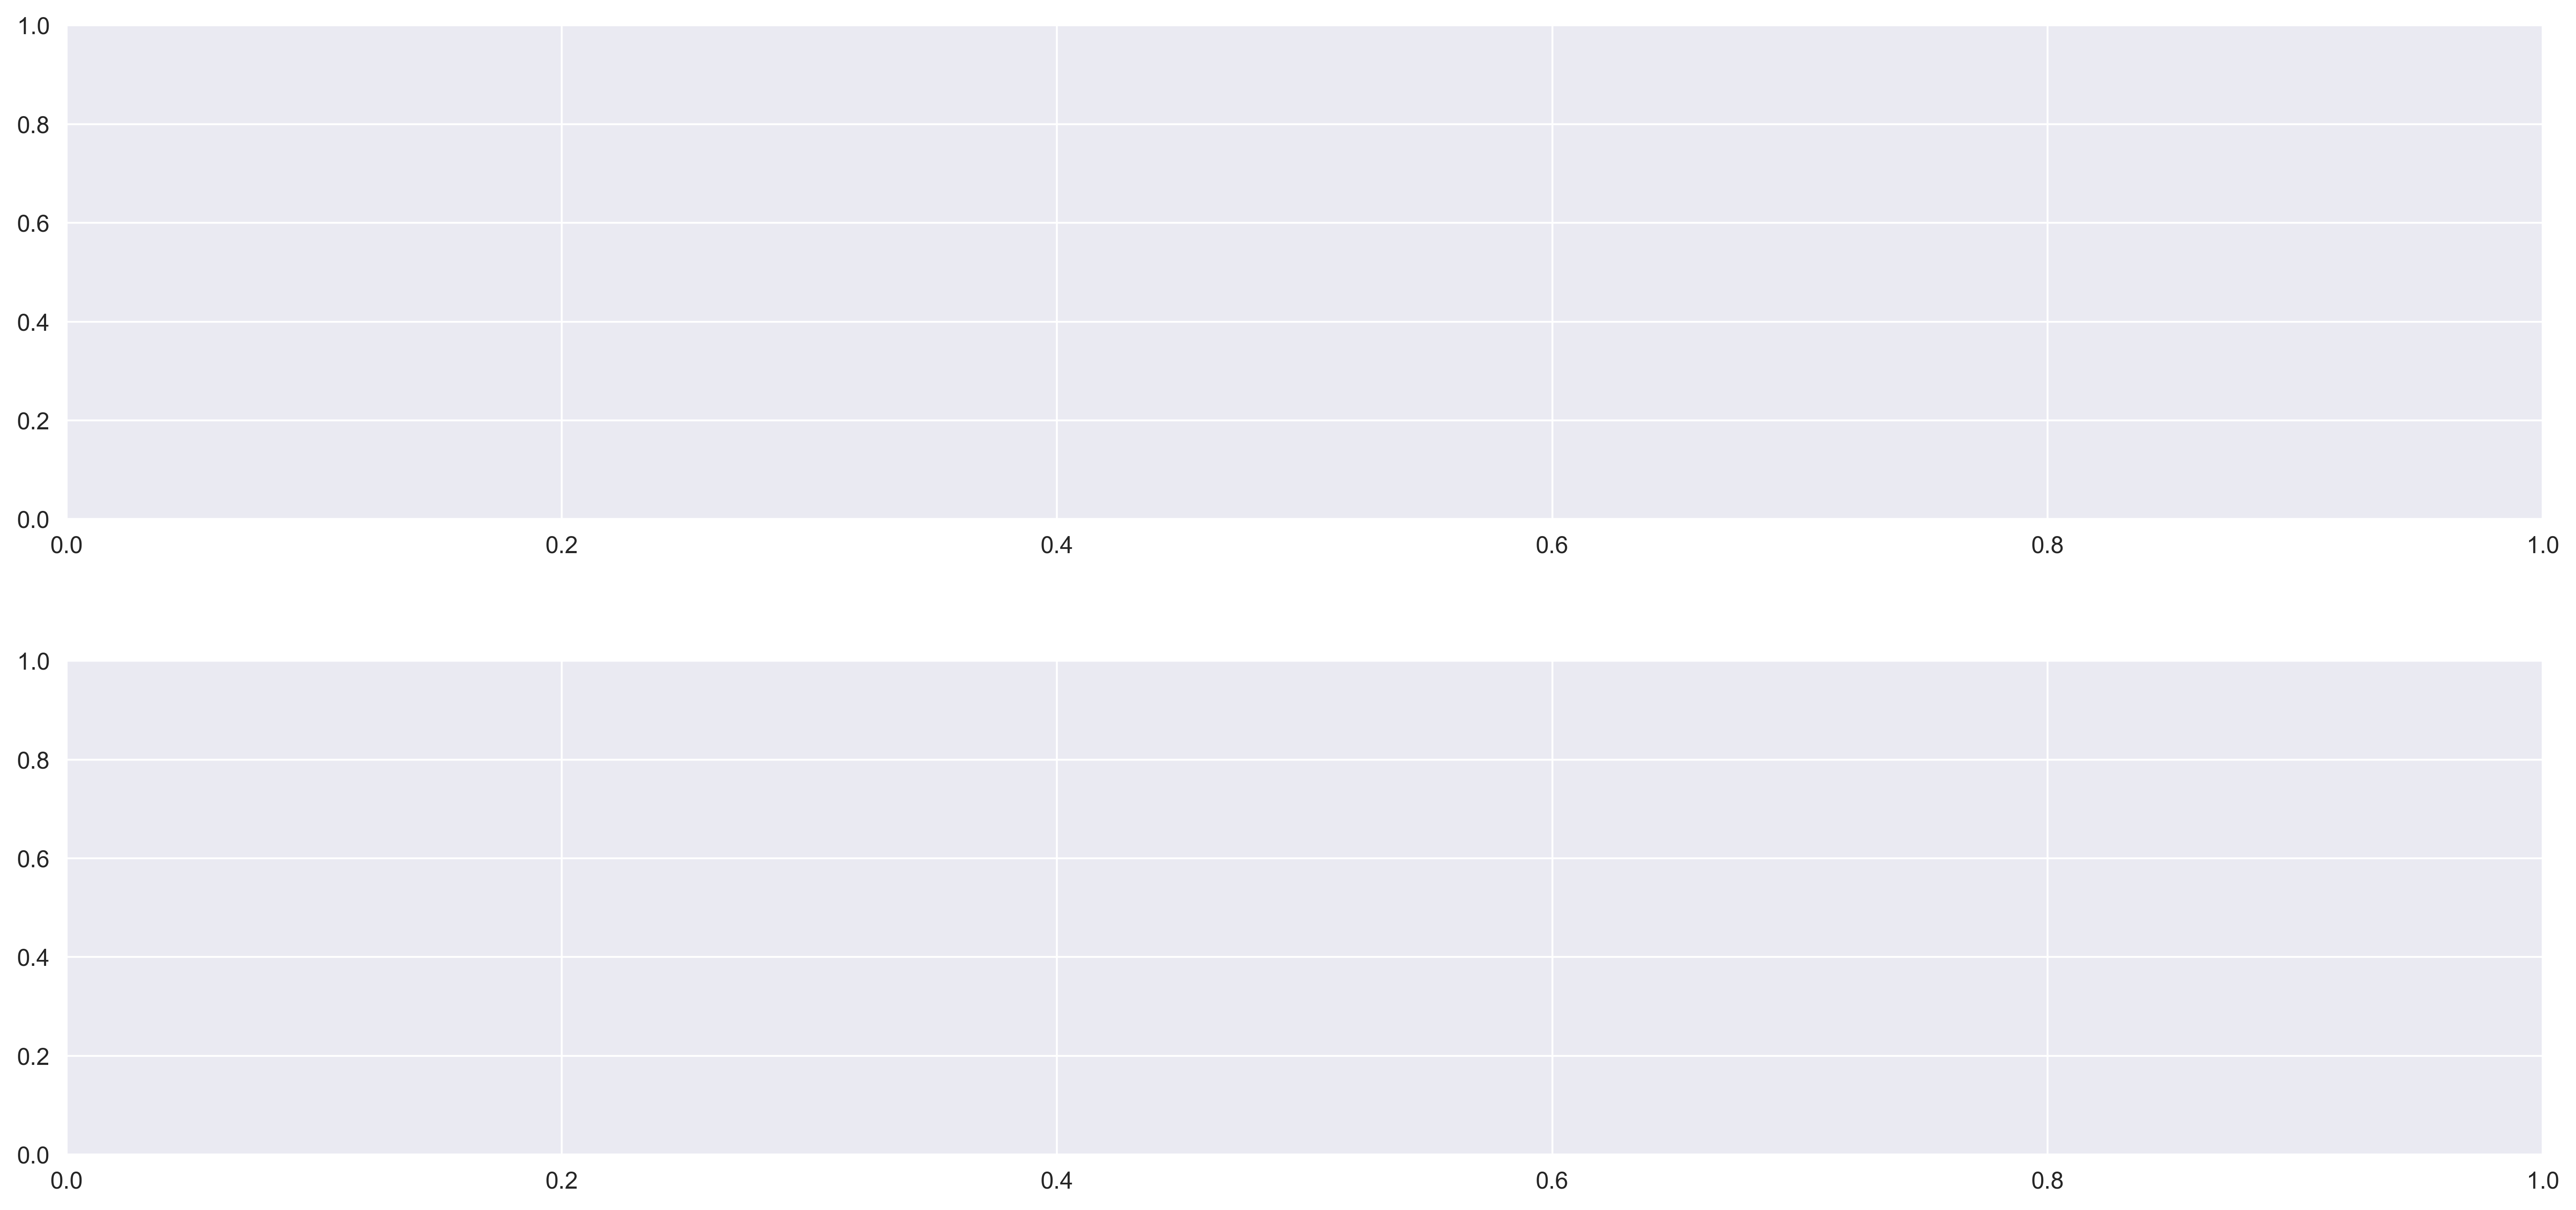

In [9]:
# TODO: live coding!
# for our question, we can plot...
# (1) histogram to see the distribution - directly related to hypothesis testing
# (2) scatterplot to see dates with O3 values that exceed the standard

# first, declare the figure
# syntax: fig, ax = plt.subplots(nrow, ncol, figsize=(width, height), dpi=dots_per_inch)
fig, ax = plt.subplots(2, 1, figsize=(16, 8), dpi=400)

# padding determines the margin between your graphs
# think: what would it look like if pad = 1.0? try it yourself!
plt.tight_layout(pad=4.0)

In [10]:
# imagine you are "storing" your visual in the axes!
print(ax)
print(len(ax))

[<Axes: > <Axes: >]
2


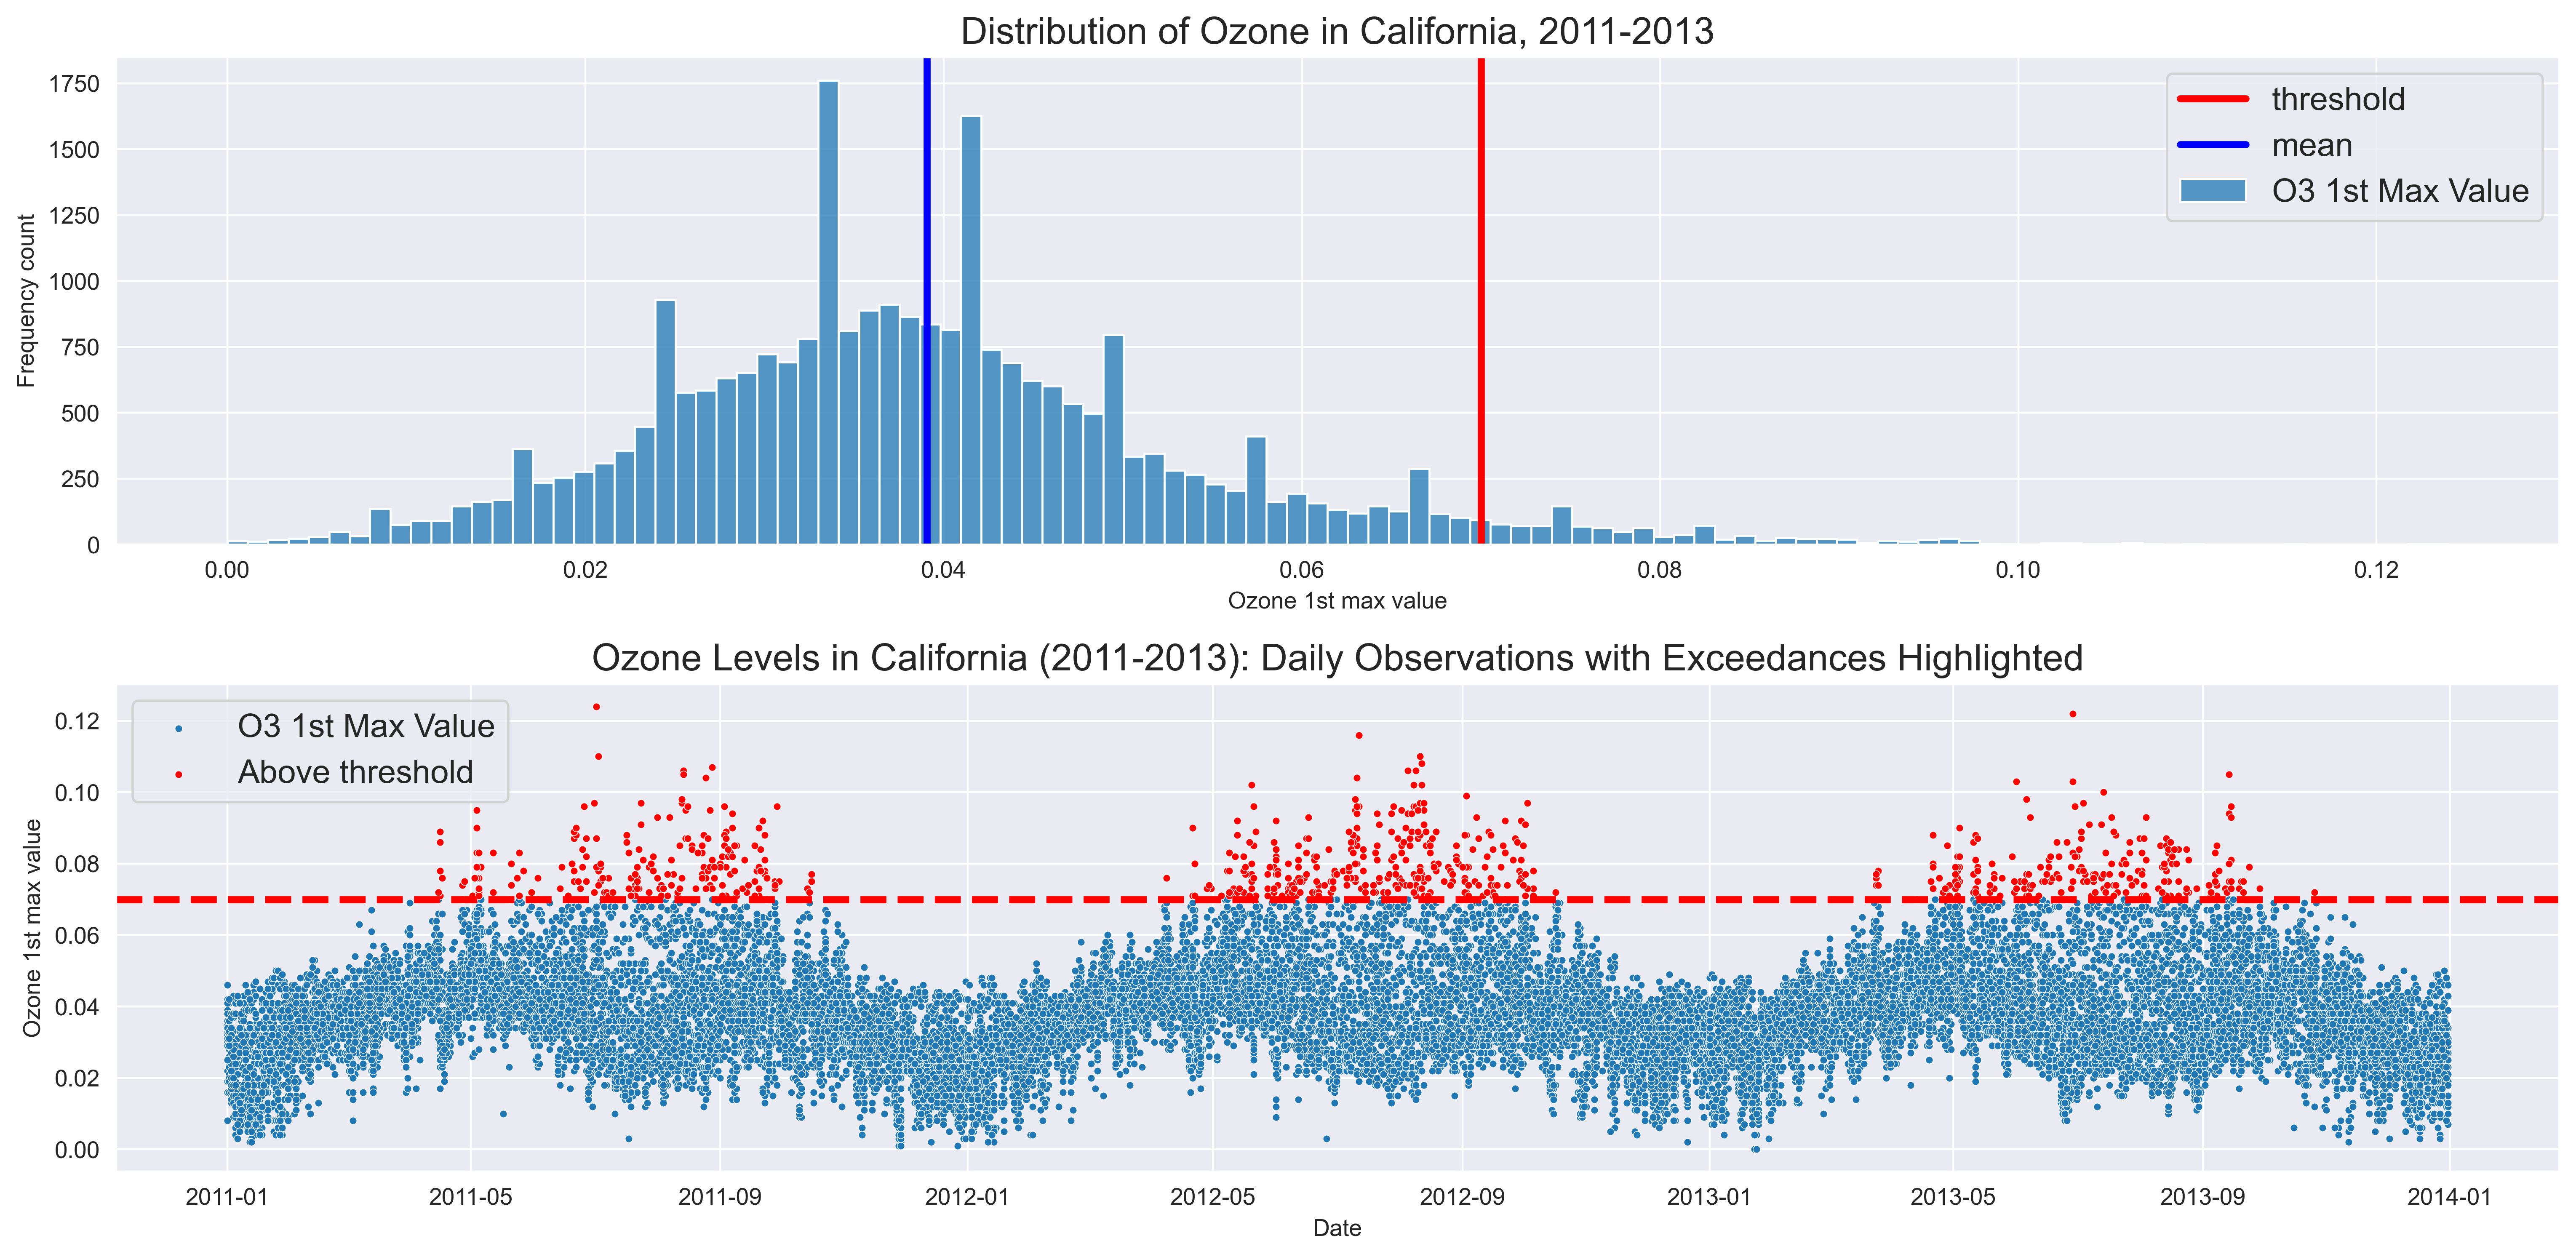

In [11]:
# *full* pipeline
# first, declare the figure
# syntax: fig, ax = plt.subplots(nrow, ncol, figsize=(width, height), dpi=dots_per_inch)
fig, ax = plt.subplots(2, 1, figsize=(16, 8), dpi=400)
plt.tight_layout(pad=4.0)

# next, plot with Seaborn
# (1) histogram to see the distribution - directly related to hypothesis testing
# (2) scatterplot to see dates with O3 values that exceed the standard
# first plot: ax[0] want to see distribution of o3
sns.histplot(x="o3",
             data=ca_2011_2013,
             label = "O3 1st Max Value",
             ax=ax[0])

# second plot: ax[1] want to dates with O3 values that exceed the standard (0.07)
# step 1: plot scatter plot
# what should the x and y axis be? remember, we want to see what O3 values look over "time"
sns.scatterplot(x="date",
                y="o3",
                data=ca_2011_2013,
                label="O3 1st Max Value", # what do we want the legend to say?
                ax=ax[1], s = 10)

# step 2: we want to "overlay" a scatterplot to highlight the points where O3 value > threshold
sns.scatterplot(x="date",
                y="o3",
                data=ca_2011_2013[ca_2011_2013['o3']>0.07],
                label="Above threshold",
                color = 'r',
                ax=ax[1], s = 10)

# don't forget to set labels and titles
ax[0].set_xlabel("Ozone 1st max value")
ax[0].set_ylabel("Frequency count")
ax[0].set_title("Distribution of Ozone in California, 2011-2013",
                fontsize = 16)

ax[1].set_xlabel("Date")
ax[1].set_ylabel("Ozone 1st max value")
ax[1].set_title("Ozone Levels in California (2011-2013): Daily Observations with Exceedances Highlighted",
                fontsize = 16)

# additional annotations
# some variables we might need later
threshold = 0.07
mean_o3 = ca_2011_2013['o3'].mean()
# for the histogram, let's try to annotate the following:
# (a) a vertical line to show the EPA threshold
ax[0].axvline(x=0.07, linewidth=3, color='r', label = "threshold")

# (b) a vertical line to show the mean of the O3
ax[0].axvline(x=ca_2011_2013['o3'].mean(), linewidth=3, color='b', label = "mean")
# important line, shows the legend
ax[0].legend(loc=0, fontsize=14)

# for the scatter plot, what do we want to annotate?
ax[1].axhline(y=0.07, linewidth=3, color='r', linestyle='--')
ax[1].legend(loc=0, fontsize=14)

# optional: add caption
# caption = "your caption here"
# fig.text(x, y, caption, ha='center')

# save figure
plt.savefig("figures/ca_o3_eda.png")
# if using Google colab:
# from google.colab import files
# files.download ("filename")

## step 6: **statistical testing**

#### what is t-statistic? how is it calculated?

$t= \frac{\bar{x} - \mu_0}{s / \sqrt{n}}$, where

- $\bar{x}$ = sample mean of $x$,
- $\mu_0$ = population mean we are testing against
- $s$ = sample standard deviation
- $\sqrt{n}$ = square root of the sample size, $n$

In [12]:
from scipy.stats import t
x = ca_2011_2013['o3']
n = len(x)
x_bar = np.mean(x)
mu_0 = 0.07
s = np.std(x, ddof=1) # ddof = 1 for *sample* standard deviation
sqrt_n = np.sqrt(n)

t_stat = (x_bar - mu_0) / (s / sqrt_n)
print(f"The t-statistic is {t_stat:.3f}")

The t-statistic is -337.366


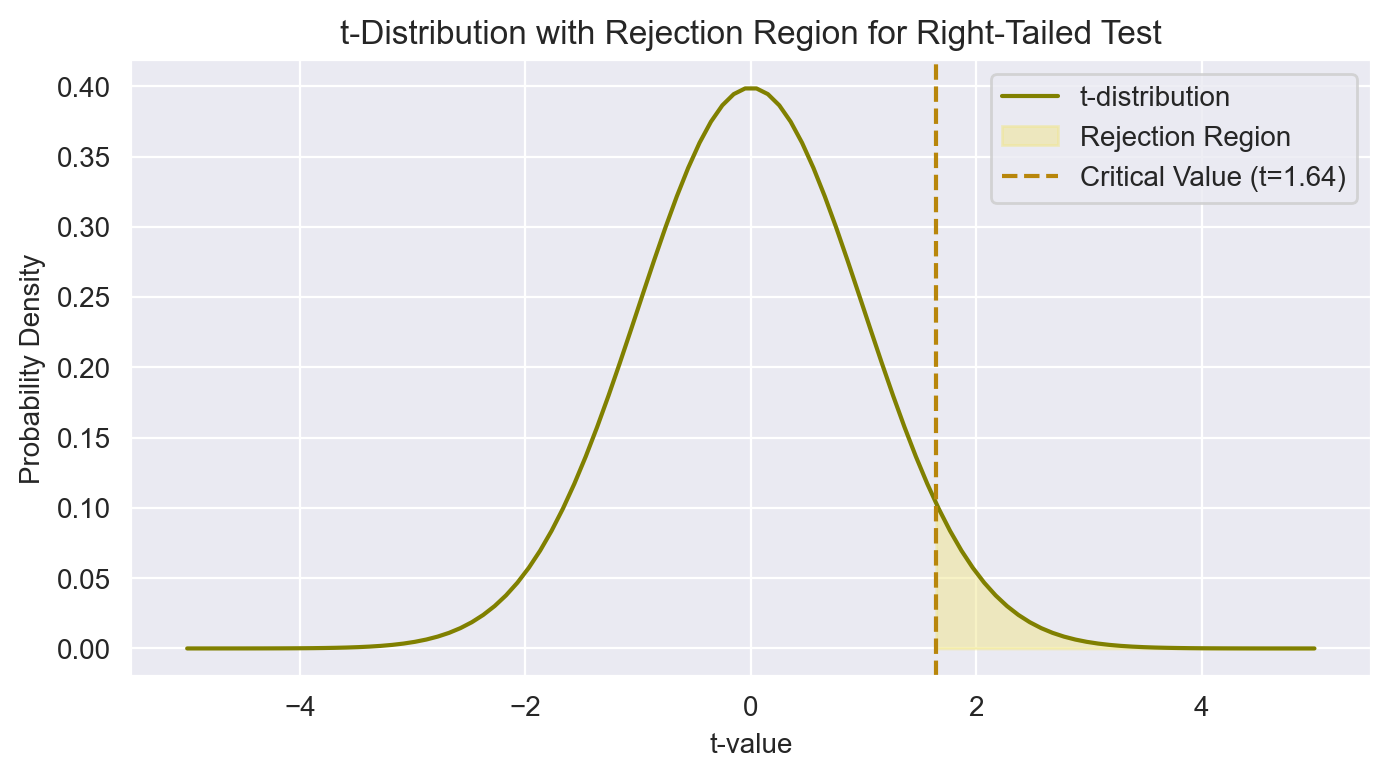

In [13]:
x = ca_2011_2013['o3']
dof = len(x) - 1
x_axis = np.linspace(-5, 5, 100)
y = stats.t.pdf(x_axis, dof)

alpha = 0.05

# Calculate the critical t-value for the right-tailed test
# identical to: critical_value = t.ppf(q = 0.95, df = dof)
critical_value = t.ppf(q = 1 - alpha, df = dof)

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=200)
plt.plot(x_axis, y, label='t-distribution', color='olive')

# Shade the rejection region
x_fill = np.linspace(critical_value, 5, 100)
y_fill = t.pdf(x_fill, dof)
plt.fill_between(x_fill, y_fill, color='khaki', alpha=0.5, label='Rejection Region')

# Add a vertical line at the critical value
plt.axvline(x=critical_value, color='darkgoldenrod', linestyle='--', label=f'Critical Value (t={critical_value:.2f})')

# Add labels and title
plt.title('t-Distribution with Rejection Region for Right-Tailed Test')
plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

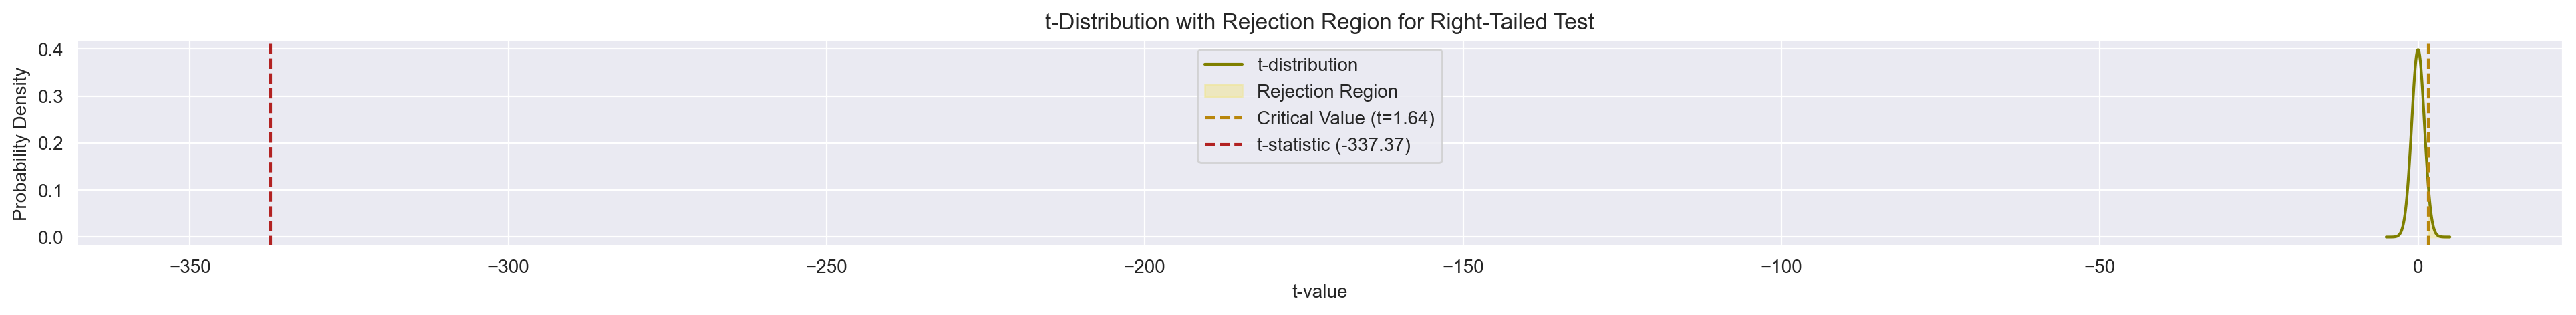

In [14]:
x = ca_2011_2013['o3']
dof = len(x) - 1
x_axis = np.linspace(-350, 5, 100)
y_axis = np.array([0]*100)

x_t = np.linspace(-5, 5, 100)
y = stats.t.pdf(x_t, dof)
alpha = 0.05

# Calculate the critical t-value for the right-tailed test
# identical to: critical_value = t.ppf(q = 0.95, df = dof)
critical_value = stats.t.ppf(q = 1 - alpha, df = dof)

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(24, 2), dpi=200)
plt.plot(x_axis,y_axis, alpha = 0)
plt.plot(x_t, y, label='t-distribution', color='olive')

# Shade the rejection region
x_fill = np.linspace(critical_value, 5, 100)
y_fill = stats.t.pdf(x_fill, dof)
plt.fill_between(x_fill, y_fill, color='khaki', alpha=0.5, label='Rejection Region')

# Add a vertical line at the critical value
plt.axvline(x=critical_value, color='darkgoldenrod', linestyle='--', label=f'Critical Value (t={critical_value:.2f})')
plt.axvline(x=t_stat, color='firebrick', linestyle='--', label=f't-statistic ({t_stat:.2f})')
# Add labels and title
plt.title('t-Distribution with Rejection Region for Right-Tailed Test')
plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.legend()
plt.show() 

Now that you have some intuition, let's see how we can do this easily!

#### conducting t-tests using `scipy.stats`

In [15]:
# peform one-tailed one-sample t-test
x = ca_2011_2013['o3']
t_stat, p_value = stats.ttest_1samp(a = x,
                              popmean = 0.070,
                              alternative="greater")
print(f"One-sample t-Test results: \nt-statistic = {t_stat:0.3f} \np-value = {p_value}")

One-sample t-Test results: 
t-statistic = -337.366 
p-value = 1.0


In [16]:
# what if we delete the alternative?
t_stat, p_value = stats.ttest_1samp(a = x,
                              popmean = 0.070)
print(f"One-sample t-Test results: \nt-statistic = {t_stat:0.3f} \np-value = {p_value}")

One-sample t-Test results: 
t-statistic = -337.366 
p-value = 0.0


In [17]:
# what if we change the alternative to "less"?
t_stat, p_value = stats.ttest_1samp(a = x,
                              popmean = 0.070,
                              alternative="less")
print(f"One-sample t-Test results: \nt-statistic = {t_stat:0.3f} \np-value = {p_value}")

One-sample t-Test results: 
t-statistic = -337.366 
p-value = 0.0


## step 7: **reporting your findings**

In [18]:
# TODO: Write your conclusion in the Markdown box below

Since the p-value is 1.0 and thus not less than 0.05, it means we do not have sufficient evidence to reject the null hypothesis.

In other words, we failed to reject the null that "the average of max ozone concentration in California is less than or equal to 0.07"

## **IMPORTANT NOTE**:
There are several variations to the t-test, such as two-sample t-tests (student's t-test and Welch's t-test for unequal variance). The most important skill here for research is:
1. Look at your data and formulate a research question.
2. Decide the most appropriate statistical test to apply.

If you ever have doubts, always ask! :)

# 3. Model-fitting example: logistic regression

Adopted from ["Logistic Regression in R - An Example"](https://www.geo.fu-berlin.de/en/v/soga-r/Basics-of-statistics/Logistic-Regression/Logistic-Regression-in-R---An-Example/index.html)

In [19]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


## **step 1:** exploratory data analysis

AKA read and understand dataset

In [20]:
hurricanes = pd.read_excel("https://userpage.fu-berlin.de/soga/data/raw-data/hurricanes.xlsx")
hurricanes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RowNames  337 non-null    int64  
 1   Number    337 non-null    int64  
 2   Name      337 non-null    object 
 3   Year      337 non-null    int64  
 4   Type      337 non-null    int64  
 5   FirstLat  337 non-null    float64
 6   FirstLon  337 non-null    float64
 7   MaxLat    337 non-null    float64
 8   MaxLon    337 non-null    float64
 9   LastLat   337 non-null    float64
 10  LastLon   337 non-null    float64
 11  MaxInt    337 non-null    int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 31.7+ KB


In [21]:
# set year to be the index
hurricanes.set_index('Year')

,RowNames,Number,Name,Type,FirstLat,FirstLon,MaxLat,MaxLon,LastLat,LastLon,MaxInt
Year,,,,,,,,,,,
1944,1,430,NOTNAMED,1,30.2,-76.1,32.1,-74.8,35.1,-69.2,80
1944,2,432,NOTNAMED,0,25.6,-74.9,31.0,-78.1,32.6,-78.2,80
1944,3,433,NOTNAMED,0,14.2,-65.2,16.6,-72.2,20.6,-88.5,105
1944,4,436,NOTNAMED,0,20.8,-58.0,26.3,-72.3,42.1,-71.5,120
1944,5,437,NOTNAMED,0,20.0,-84.2,20.6,-84.9,19.1,-93.9,70
...,...,...,...,...,...,...,...,...,...,...,...
2000,333,1227,GORDON,1,25.2,-85.4,26.1,-84.9,28.0,-83.8,70
2000,334,1229,ISAAC,0,14.3,-33.2,26.6,-54.2,39.7,-47.9,120
2000,335,1230,JOYCE,0,12.4,-38.8,12.2,-42.5,10.5,-48.6,80


### plot the hurricane counts over the years

(array([ 0,  8, 16, 24, 32, 40, 48]),
 [Text(0, 0, '1944'),
  Text(8, 0, '1952'),
  Text(16, 0, '1960'),
  Text(24, 0, '1968'),
  Text(32, 0, '1976'),
  Text(40, 0, '1984'),
  Text(48, 0, '1992')])

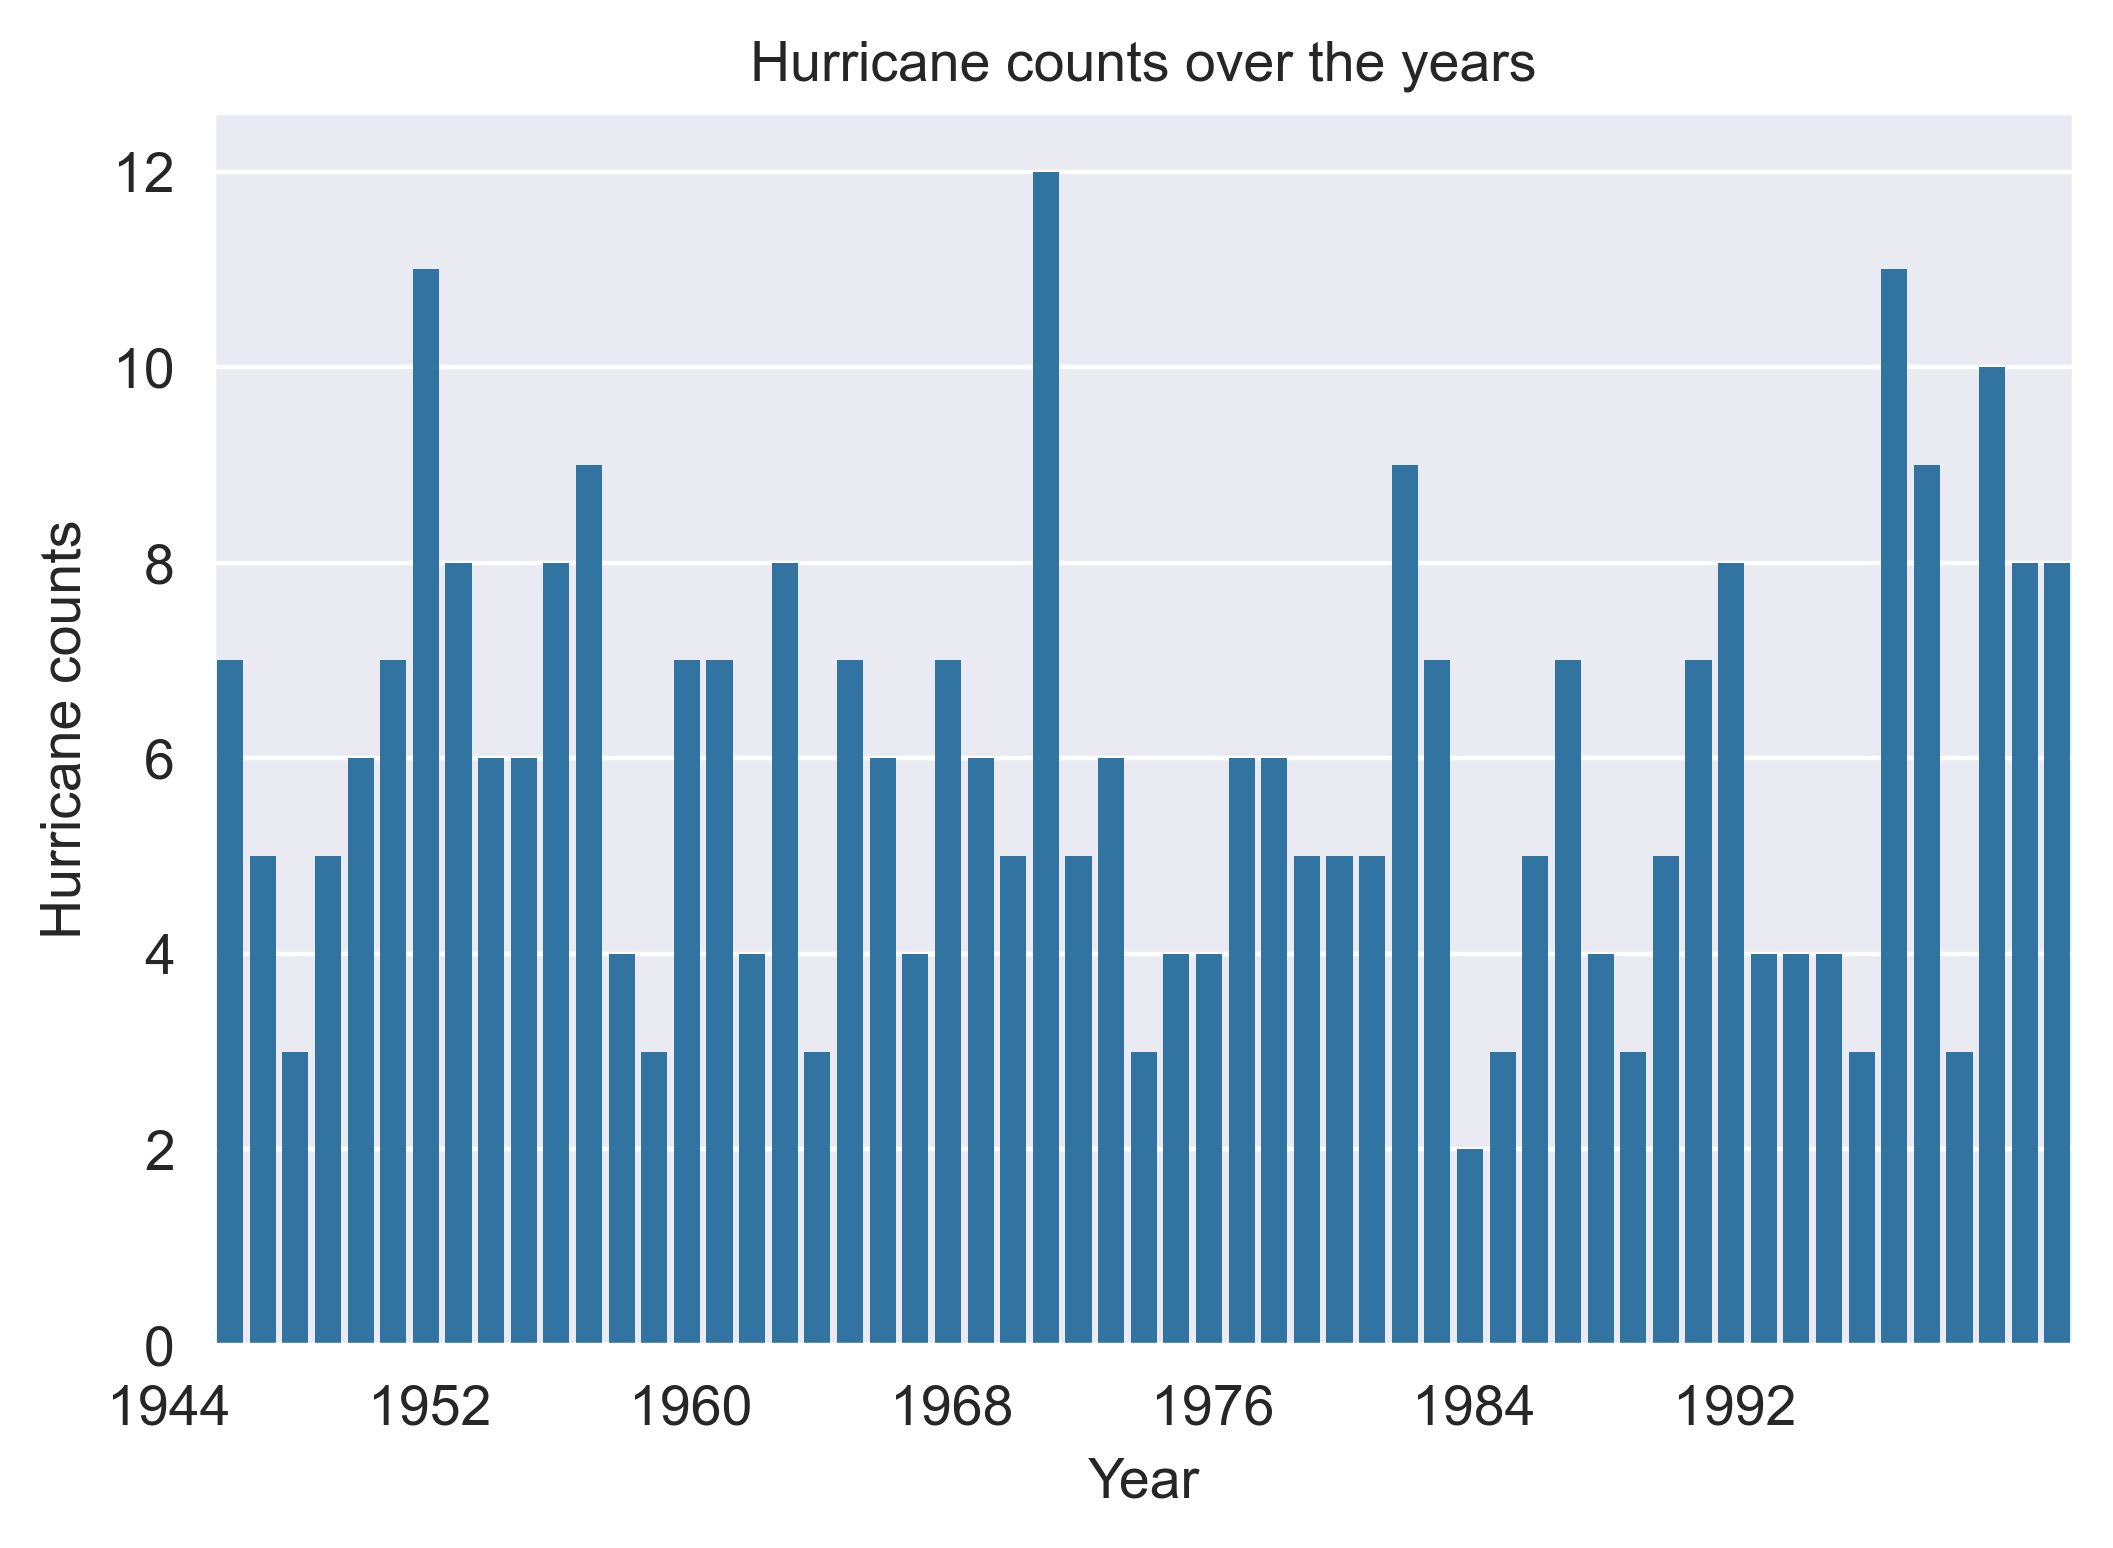

In [22]:
# Assuming hurricanes is a pandas DataFrame
yearly_counts = hurricanes.groupby('Year').count()
fig, ax = plt.subplots(1, 1, figsize = (6, 4), dpi = 400)
sns.barplot(x='Year',y='Number',data=yearly_counts, ax = ax,linewidth=0)
ax.set_xticks([8*n for n in range(7)])
# labels for x and y axis
plt.xlabel('Year')
plt.ylabel('Hurricane counts')

# title of plot
plt.title('Hurricane counts over the years',fontsize=10)
ax.set_xticks([8*n for n in range(7)])
plt.xticks(rotation=0, ha='right')

### plot the hurricane counts over the years, grouped by "type"

In [23]:
# step 1: check how many unique types of hurricane exist
hurricanes['Type'].value_counts()

Type
0    187
1     77
3     73
Name: count, dtype: int64

What do you notice? The hurricane types are labeled by numbers. By looking at the dataset, there's no way for us to understand what Type 0, 1, 3 mean respectively. Therefore, it is always important to read the [metadata](https://myweb.fsu.edu/jelsner/temp/Data.html) and documentation.

In [24]:
yearly_counts = hurricanes.groupby('Year').count()
year = list(hurricanes['Year'].unique())
y1 = hurricanes[hurricanes['Type']==0].groupby('Year').count()['Number']
y2 = hurricanes[hurricanes['Type']==1].groupby('Year').count()['Number']
y3 = hurricanes[hurricanes['Type']==3].groupby('Year').count()['Number']
hurricanes_by_type = pd.DataFrame({"tropical-only": y1, "baroclinically-enhanced": y2, "baroclinically-initiated": y3}, )

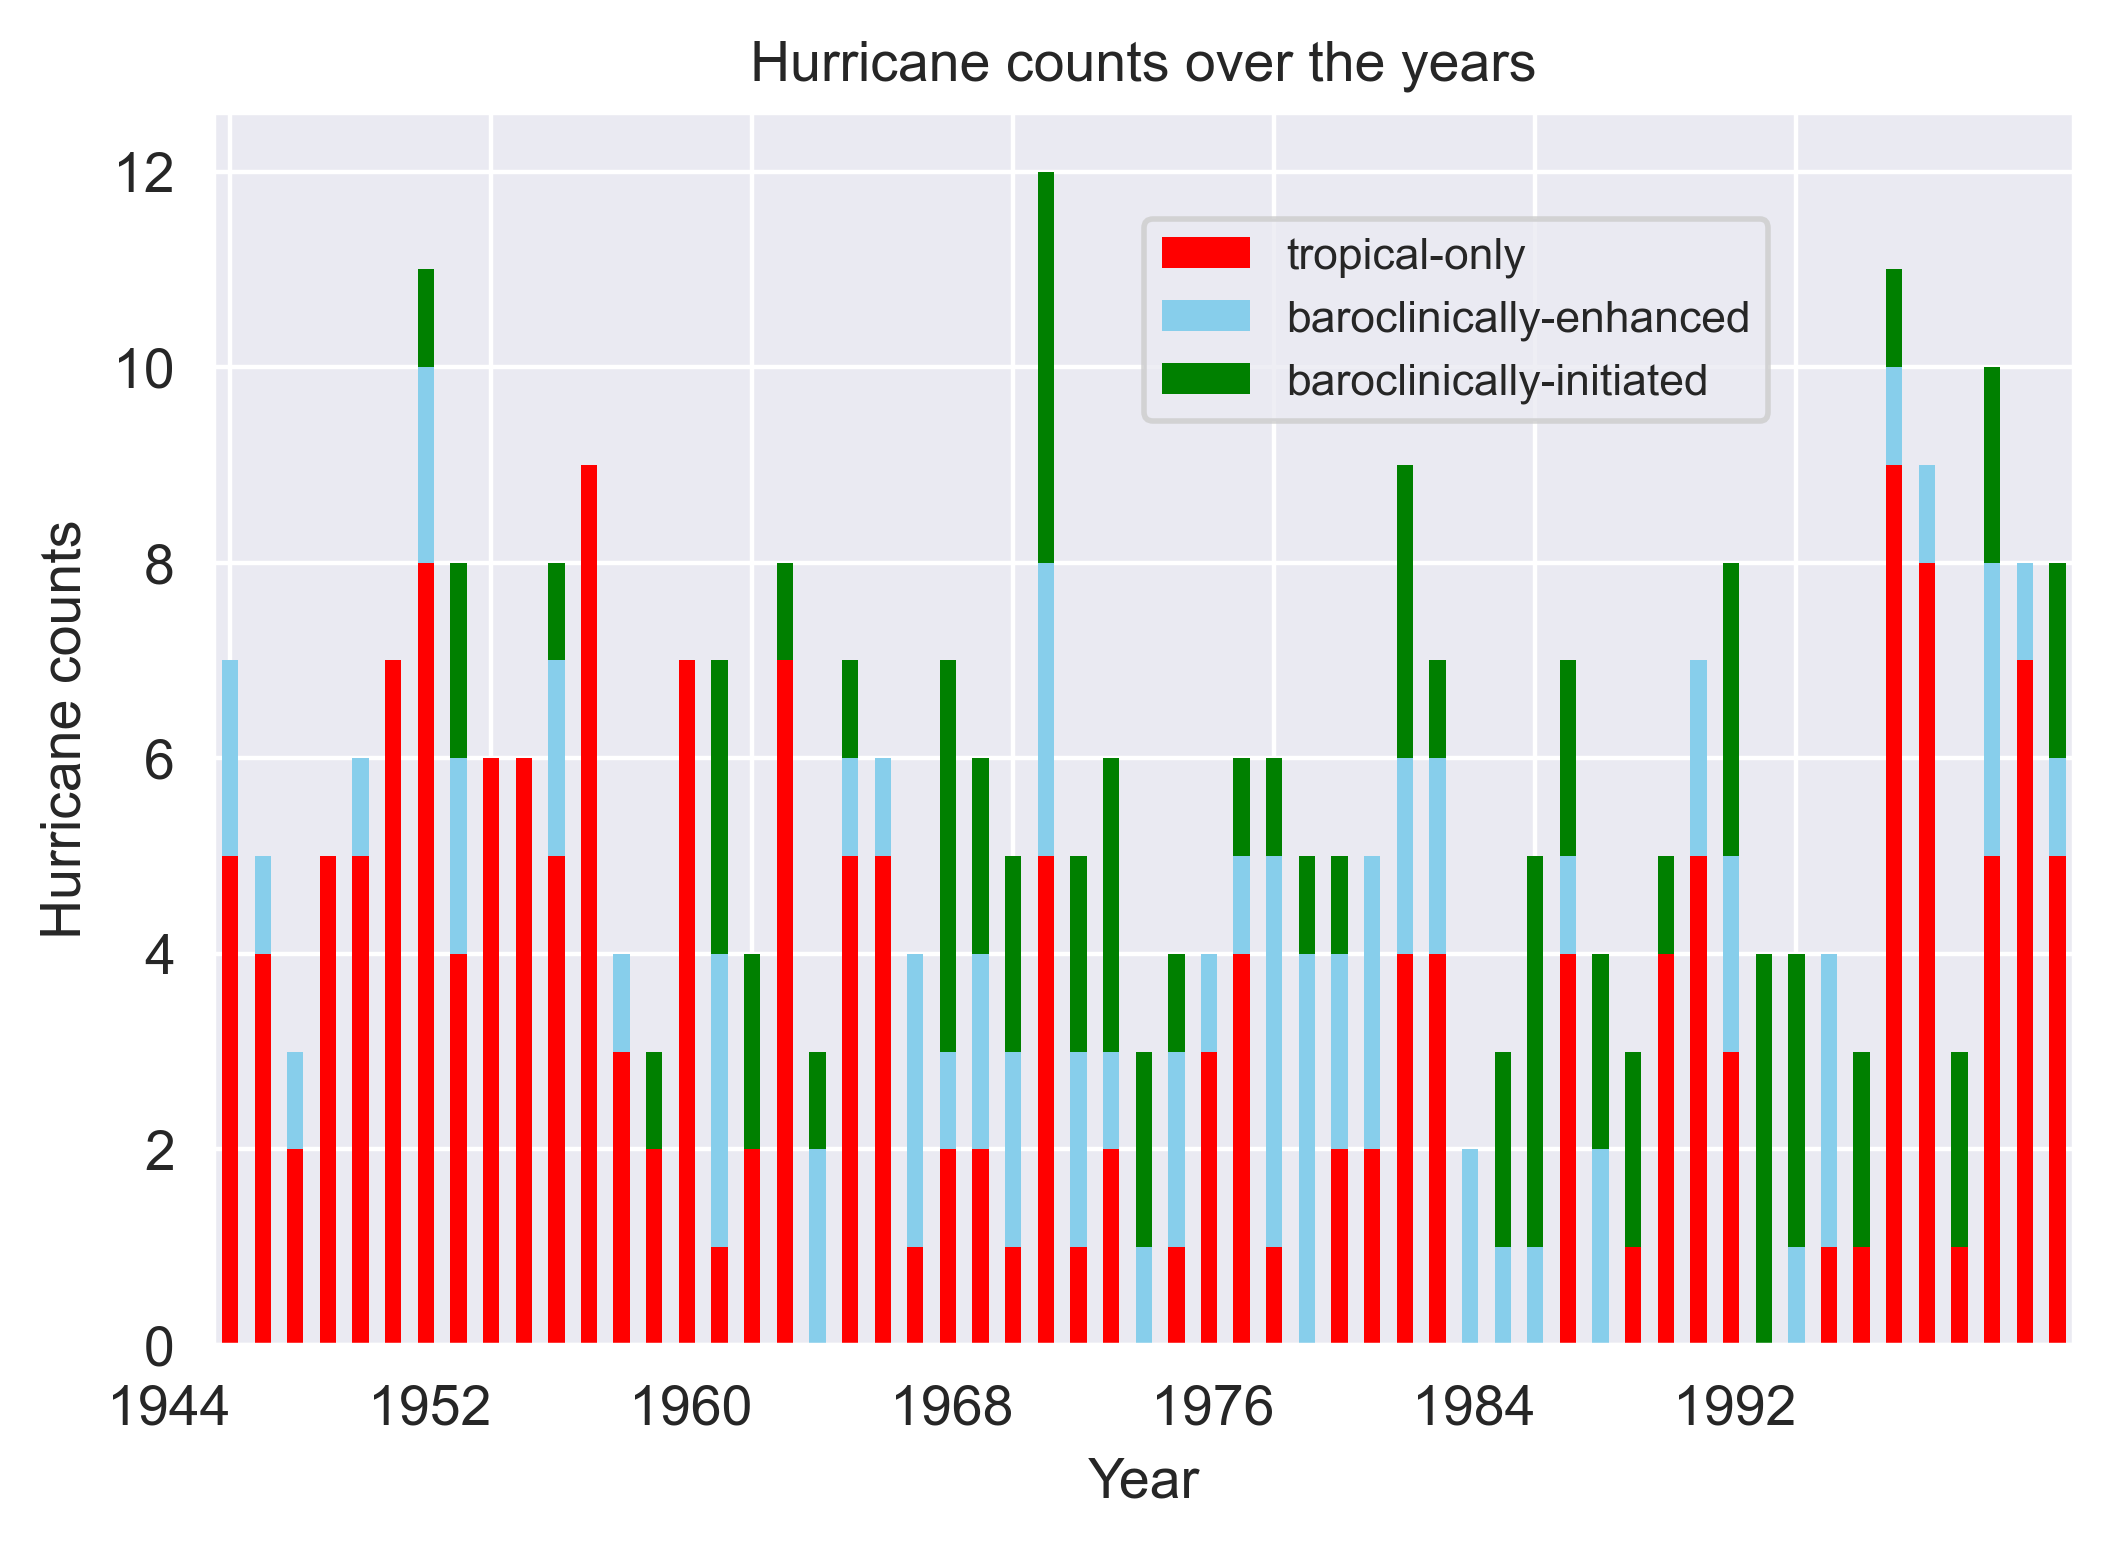

In [25]:
# declare digure
fig, ax = plt.subplots(1, 1, figsize = (6, 4), dpi = 400)

# create stacked bar chart
hurricanes_by_type.plot(kind='bar',stacked=True, color=['red', 'skyblue', 'green'], ax=ax, linewidth=0)

# labels for x and y axis
plt.xlabel('Year')
plt.ylabel('Hurricane counts')

# title of plot
plt.title('Hurricane counts over the years',fontsize=10)
ax.set_xticks([8*n for n in range(7)])
plt.xticks(rotation=0, ha='right')
plt.legend(loc=(0.5,0.75),fontsize=8)

### last but not least, let's plot the geographical distirbution of the different hurricanes!

In [26]:
# created with the help of https://www.codeconvert.ai/r-to-python-converter
%pip install folium
import folium

# create map
m = folium.Map(location=[0, 0], zoom_start=2)

# add tiles
folium.TileLayer('OpenStreetMap').add_to(m)
folium.TileLayer('Esri OceanBasemap').add_to(m)

# define colors
cols = ["red", "navy", "__", "green"]

# Add circle markers
for index, row in hurricanes.iterrows():
    folium.CircleMarker(
        location=(row['FirstLat'], row['FirstLon']), # latitude, longtitude
        radius=2.5,
        color=cols[row['Type']], 
        popup=f"Year: {row['Year']}"
    ).add_to(m)

# Add legend
legend_html = '''
    <div style="position: fixed; 
                top: 10px; left: 10px; width: 200px; height: 100px; 
                border:2px solid grey; z-index:9999; font-size:14px; 
                background-color:white;">
        <h4>Type of Hurricane</h4>
        <i style="background:red; width:10px; height:10px; display:inline-block;"></i> tropical<br>
        <i style="background:navy; width:10px; height:10px; display:inline-block;"></i> baroclinically-enhanced<br>
        <i style="background:green; width:10px; height:10px; display:inline-block;"></i> baroclinically-initiated<br>
    </div>
'''
m.get_root().html.add_child(folium.Element(legend_html))
m

Note: you may need to restart the kernel to use updated packages.


## **step 2**: define the problem

### aside: understanding **logistical regression**
Recall how linear regression follows the formula below. It aims to see the predicted value of a dependent variable $y$ given different coefficients.
$$y = \beta_0+\beta_1x$$

Logistical regression also has the parameters $\beta_i$'s like linera regression. However, the target $y$ is *not* the value of the actual dependent variable but instead what we call "log-odds."

In other words, given $\beta_0$ and $\beta_1$, you calculate the odds of y=1 using the below equation. 

$$p(y=1) = \phi(\eta) = \frac{1}{1+e^{-\eta}}= \frac{1}{1+e^{-(\beta_0+\beta_1x_1)}}$$

Some examples:
- Deciding the likelihood that today will rain (yes/no)
- Predicting whether or not a candidate will get into college
- Evaluating the risk of getting breast cancer


Given the above map, what do we think is a *potential* factor influencing the type of hurricane (tropical vs. non-tropical) formed?

Since latitude affects hurricane type, let's try to fit a logistic regression model for hurrican `Type` and `FirstLat`.

To simply the question, let's assume we are doing a **binary classification**: tropical vs. non-tropical

In [27]:
# create new column called new_type 
# where we encode Type = 0 (tropical) to 0, and Type = 1 or 3 (non-tropical) to 1
hurricanes['new_type'] = (hurricanes['Type'] != 0).astype(int)

# do a values count for sanity check (i.e., we should expect 187 entries for "0")
hurricanes['new_type'].value_counts()

new_type
0    187
1    150
Name: count, dtype: int64

## **step 3**: fitting the model!

To fit models in Python, there are two main libraries: 
1. `statsmodels.formula.api` that allows "R-style" formulas for fitting models (e.g., `smf.ols(formula='y ~ x', data=df))`, see example [here](https://www.statsmodels.org/stable/example_formulas.html) --> designed for *explanatory* purposes

2. `scikit-learn` usually designed for *prediction* purposes

We will show examples in both to see that they achieve the same results

sources:
- https://medium.com/@hsrinivasan2/linear-regression-in-scikit-learn-vs-statsmodels-568b60792991


In [28]:
# install and import necessary packages
%pip install scikit-learn
%pip install statsmodels
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm 
import statsmodels.formula.api as smf

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### prepare data: declare X and y

In [29]:
# prepare data

### what is our X? 
# in our formula, recall that we have an intercept variable. How do we account that?
hurricanes['Intercept'] = 1

# HINT: what is the column that represents latitude?
X = hurricanes[['Intercept', 'FirstLat']]  # predictor variables

### what is our y?
# HINT: what is the variable whose probability we are trying to predict?
y = hurricanes['new_type']  # target variable

### print out the shape
print(X.shape, y.shape)

(337, 2) (337,)


### using `statsmodels`

1. fit model
2. print model summary
3. predict on new values

source:
- https://www.geeksforgeeks.org/logistic-regression-using-statsmodels/

In [30]:
# if you want to see all the modles offered by statsmodels, you can print it out!
print(dir(sm))

['BayesGaussMI', 'BinomialBayesMixedGLM', 'ConditionalLogit', 'ConditionalMNLogit', 'ConditionalPoisson', 'Factor', 'GEE', 'GLM', 'GLMGam', 'GLS', 'GLSAR', 'GeneralizedPoisson', 'HurdleCountModel', 'Logit', 'MANOVA', 'MI', 'MICE', 'MICEData', 'MNLogit', 'MixedLM', 'NegativeBinomial', 'NegativeBinomialP', 'NominalGEE', 'OLS', 'OrdinalGEE', 'PCA', 'PHReg', 'Poisson', 'PoissonBayesMixedGLM', 'ProbPlot', 'Probit', 'QuantReg', 'RLM', 'RecursiveLS', 'SurvfuncRight', 'TruncatedLFNegativeBinomialP', 'TruncatedLFPoisson', 'WLS', 'ZeroInflatedGeneralizedPoisson', 'ZeroInflatedNegativeBinomialP', 'ZeroInflatedPoisson', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '__version__', '__version_info__', 'add_constant', 'categorical', 'cov_struct', 'datasets', 'distributions', 'duration', 'emplike', 'families', 'formula', 'gam', 'genmod', 'graphics', 'iolib', 'load', 'load_pickle', 'multivariate', 'nonparametric', 'qqline', 'qqplot'

#### statsmodels option 1: `sm`

In [31]:
# Fit the logistic regression model
log_reg = sm.Logit(y, X).fit()

# print model summary
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.344258
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               new_type   No. Observations:                  337
Model:                          Logit   Df Residuals:                      335
Method:                           MLE   Df Model:                            1
Date:                Mon, 25 Nov 2024   Pseudo R-squ.:                  0.4990
Time:                        01:40:05   Log-Likelihood:                -116.02
converged:                       True   LL-Null:                       -231.56
Covariance Type:            nonrobust   LLR p-value:                 3.465e-52
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.0826      0.961     -9.446      0.000     -10.967      -7.198
FirstLat       0.3728      0.

#### interpreting the results

Look at the `coef` column:
- Intercept ($\beta_0$): -9.0826
- First Lat ($\beta_1$): 0.3728

Let's write out the by plugging in the $\beta$ values:
$$p(y=1) = \frac{1}{1+e^{-(-9.0826+0.3728*x_1)}}$$

**ACTIVITY:** find the latitude of your home count and plug it in to $x_1$, what is the probability of there is a non-tropical hurricane?

In [42]:
# predicting new data
# first, let's declare `X_test`
first_lat = [10, 23.5, 30]
X_test = pd.DataFrame({"Intercept":[1]*3, "FirstLat": first_lat})

# using log_reg
predictions = log_reg.predict(X_test)
pred_df = pd.DataFrame({"Latitude":first_lat, "Probability of non-tropical hurricane": predictions})
display(pred_df)

,Latitude,Probability of non-tropical hurricane
0,10.0,0.004705
1,23.5,0.420398
2,30.0,0.891122


#### statsmodels option #2: `smf`

In [33]:
# slightly different method using smf (good for those who have experience in R!)
log_reg_2 = smf.logit("new_type ~ FirstLat", data=hurricanes).fit()

# print model summary
print(log_reg_2.summary()) 

Optimization terminated successfully.
         Current function value: 0.344258
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               new_type   No. Observations:                  337
Model:                          Logit   Df Residuals:                      335
Method:                           MLE   Df Model:                            1
Date:                Mon, 25 Nov 2024   Pseudo R-squ.:                  0.4990
Time:                        01:40:06   Log-Likelihood:                -116.02
converged:                       True   LL-Null:                       -231.56
Covariance Type:            nonrobust   LLR p-value:                 3.465e-52
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.0826      0.961     -9.446      0.000     -10.967      -7.198
FirstLat       0.3728      0.

source:
- https://stackoverflow.com/questions/13218461/predicting-values-using-an-ols-model-with-statsmodels

In [44]:
# predicting new data
# using log_reg_2 
# should yield the same results
predictions = log_reg_2.get_prediction(exog = X_test) 
print(predictions.summary_frame())

   predicted        se  ci_lower  ci_upper
0   0.004705  0.002701  0.001524   0.01443
1   0.420398  0.040645  0.343423   0.50145
2   0.891122  0.028045  0.822841   0.93516


### using `scikit-learn`

In [35]:
# fit model
logr = LogisticRegression()
logr.fit(X,y)

LogisticRegression()

In [36]:
# print summary
logr_summary = pd.DataFrame(zip(X.columns, [logr.intercept_[0], logr.coef_[0][1]]))
logr_summary

,0,1
0,Intercept,-9.068846
1,FirstLat,0.372252


In [45]:
# Assuming you have new data X_new
predictions = logr.predict_proba(X_test)
print(predictions[:,1])

pred_df = pd.DataFrame({"Latitude":first_lat, "Probability of non-tropical hurricane": predictions[:,1]})
display(pred_df)

[0.00474323 0.42046041 0.89078192]


,Latitude,Probability of non-tropical hurricane
0,10.0,0.004743
1,23.5,0.420460
2,30.0,0.890782


## **(optional) step 4**: let's visualize what this looks like!

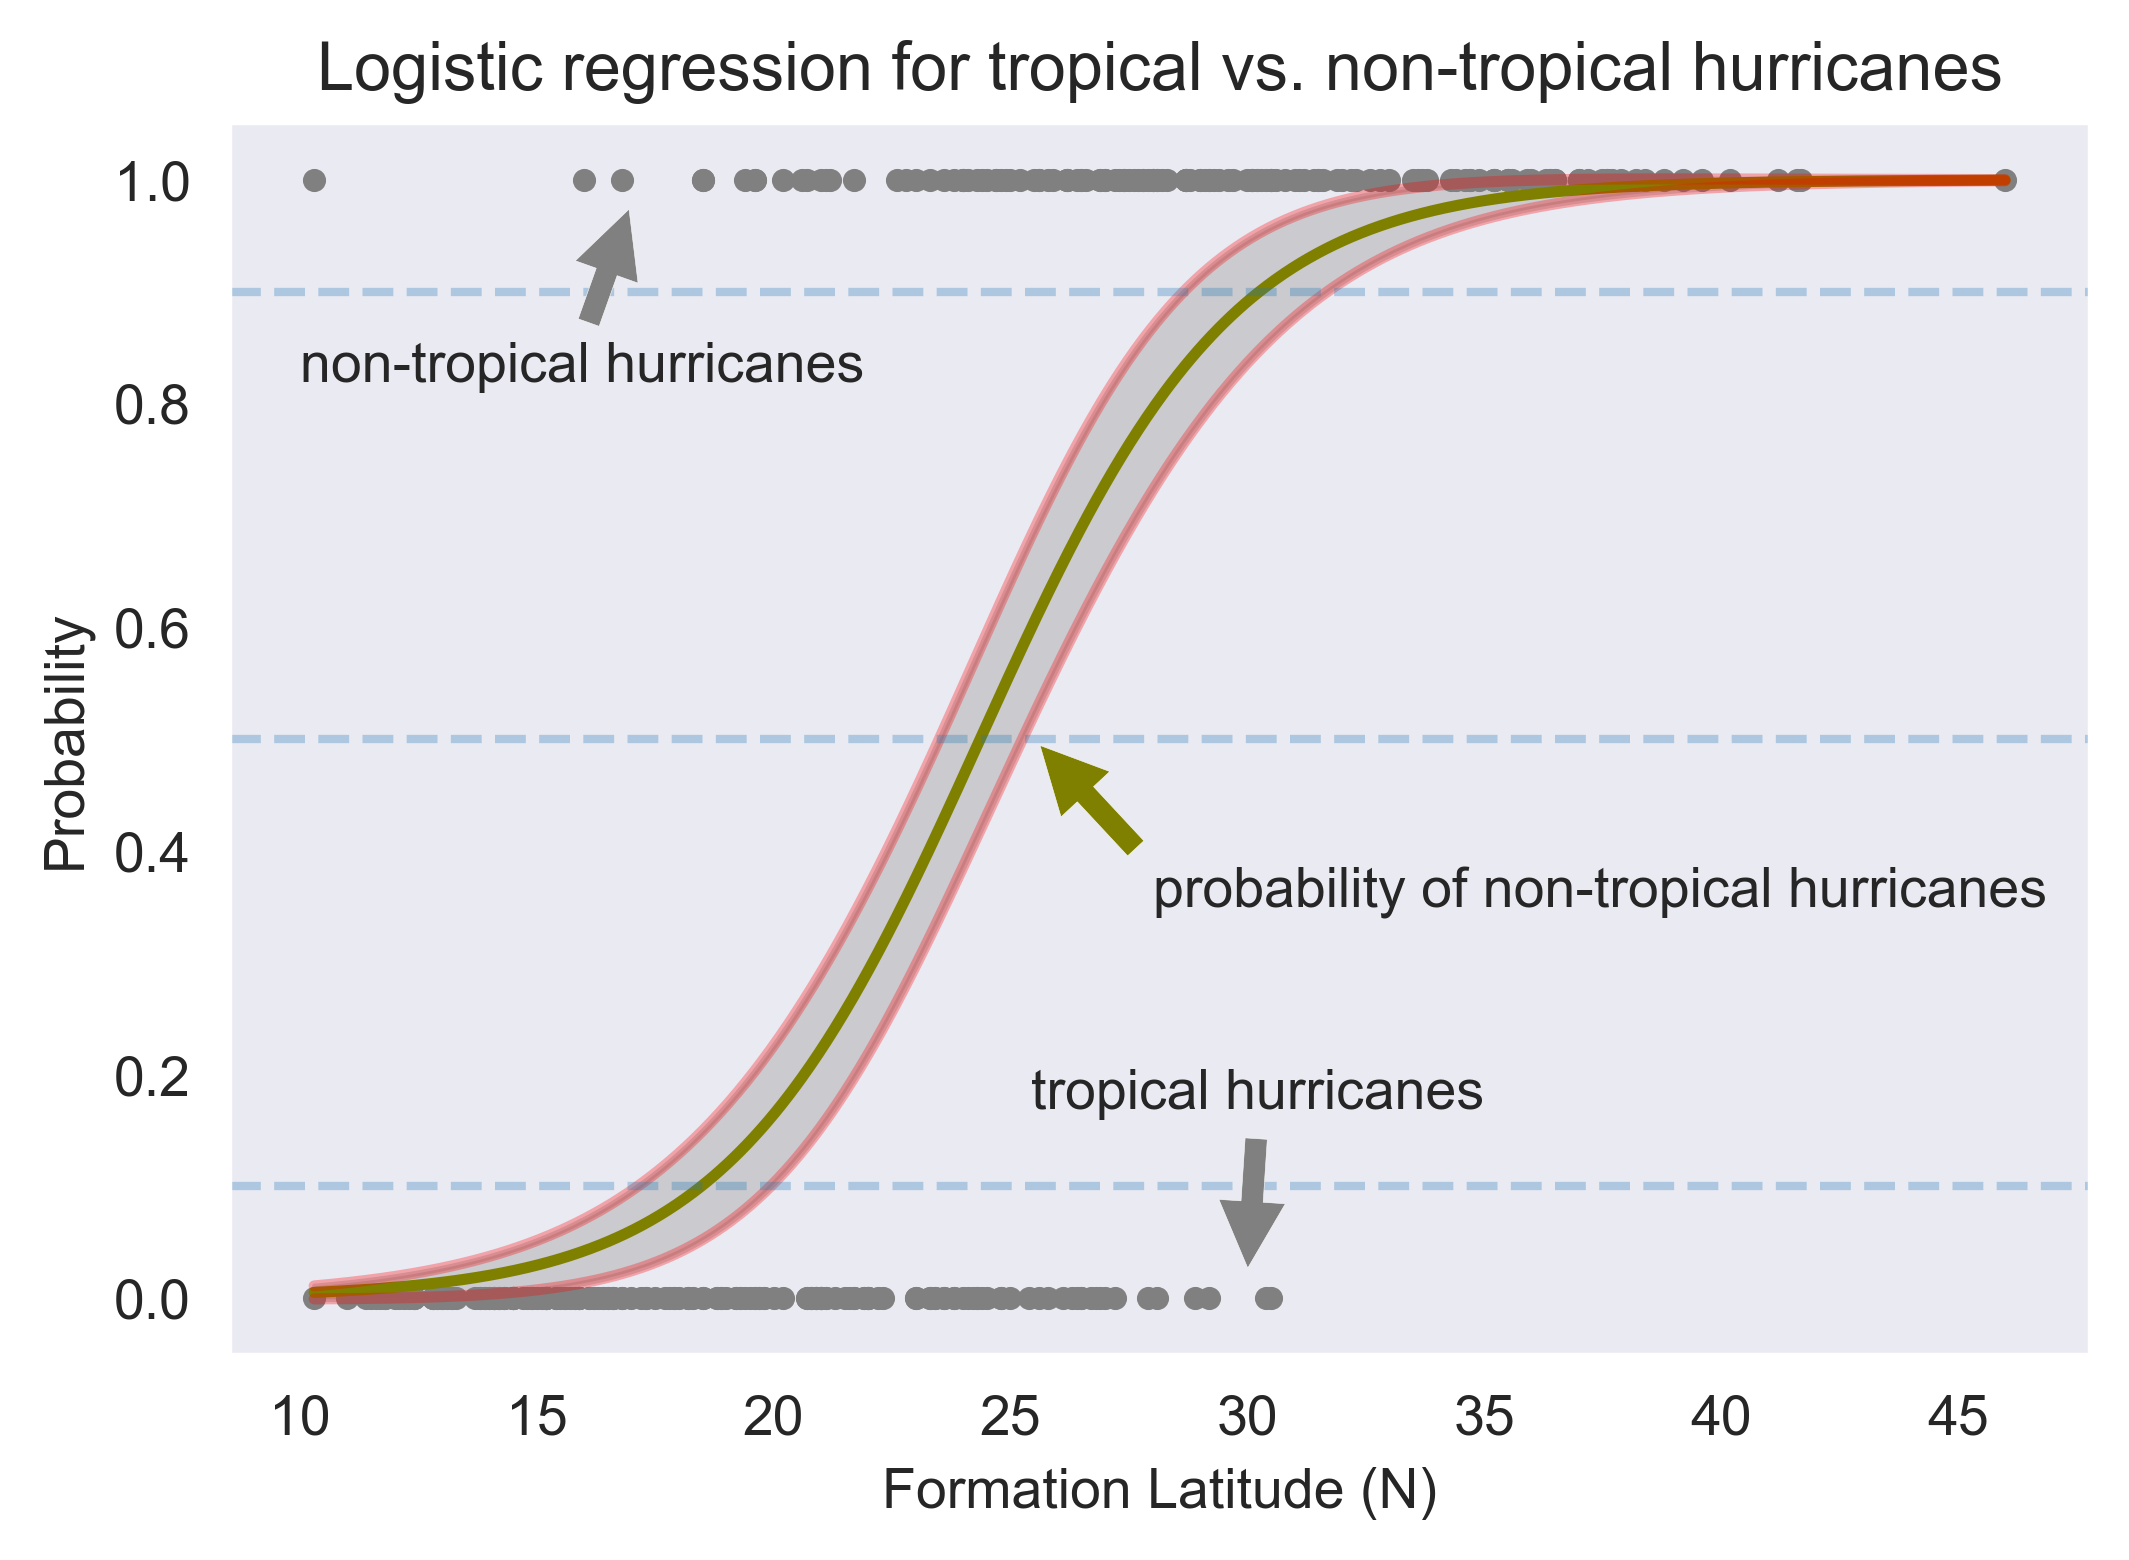

In [38]:
latitudes = np.linspace(min(hurricanes['FirstLat']), max(hurricanes['FirstLat']), 1000)
X_new = pd.DataFrame({"Intercept":[1]*1000, "FirstLat": latitudes})

probs = log_reg_2.get_prediction(exog = X_new).summary_frame()

pm = probs['predicted']
pu = probs['predicted'] + probs['se'] * 1.96  # 95% confidence interval
pl = probs['predicted'] - probs['se'] * 1.96  # 95% confidence interval

fig, ax = plt.subplots(1,1, figsize=(6,4), dpi=400)
plt.scatter(hurricanes['FirstLat'], hurricanes['new_type'], s=10, color = "grey")
plt.ylabel("Probability")
plt.xlabel("Formation Latitude (N)")

plt.grid()
plt.fill_between(latitudes, pl, pu, alpha=0.3, color='grey')
plt.plot(latitudes, pm, linewidth=2, color = "olive")
plt.plot(latitudes, pu, linewidth=2, color="red", alpha = 0.3)
plt.plot(latitudes, pl, linewidth=2, color="red", alpha = 0.3)

plt.axhline(y=0.1, linestyle='--', alpha = 0.3)
plt.axhline(y=0.5, linestyle='--', alpha = 0.3)
plt.axhline(y=0.9, linestyle='--', alpha = 0.3)

plt.annotate('tropical hurricanes', xy=(30, 0.02),
             xytext=(35, 0.17),
             arrowprops=dict(facecolor='grey', shrink=0.05,linewidth = 0.1),
             ha='right')
plt.annotate('non-tropical hurricanes', xy=(17, 0.98),
             xytext=(10, 0.82*max(y)),
             arrowprops=dict(facecolor='grey', shrink=0.05, linewidth = 0.1),
             ha='left')

plt.annotate('probability of non-tropical hurricanes', xy=(25.5, 0.5),
             xytext=(28, 0.35),
             arrowprops=dict(facecolor='olive', shrink=0.05, linewidth = 0.1),
             ha='left')

plt.title("Logistic regression for tropical vs. non-tropical hurricanes")

plt.show()

# Appendix 1. Visualization Recipe

Below is a skeleton code for visualizing with Seaborn and Matplotlib, but this is NOT meant for you to follow the format stringently.
```
# skeleton code for plotting in python

# first, declare the figure
fig, ax = plt.subplots(n_row, n_col, figsize = (width, height), dpi = 400)

# next, plot with Seaborn
# note: change the ax=ax[i] argument if you have multiple subplots
sns.histplot(x=iv, data=data, ax=ax)
sns.lineplot(x=iv, y=dv, data=data, label="legend label", ax=ax)
sns.barplot(x=iv, y=dv, data=data, ax=ax)

# don't forget to set labels and titles
# similarly, change ax to ax[i] if you have multiple subplots
ax.set_xlabel("your xlabel here")
ax.set_ylabel("your ylabel here")
ax.set_title("your title here")

# optional: add caption
# similarly, change ax to ax[i] if you have multiple subplots
caption = "your caption here"
ax.text(x, y, caption, ha='center')

# save figure
plt.savefig("filename.png")
# if using Google colab:
files.download("filename.png")
```